In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [10]:
url = "https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d"
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

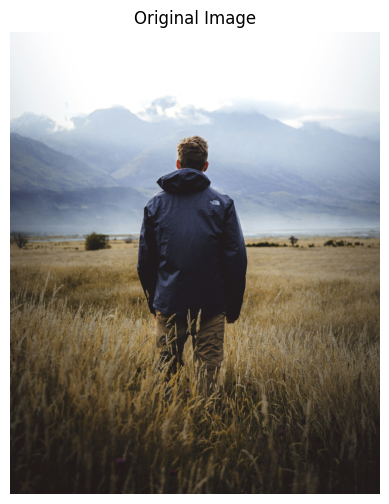

In [11]:
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [12]:
def quantize_image(img, levels):
    """
    Quantize the RGB image into 'levels' intensity values per channel.
    Levels must be between 2 and 256.
    """
    if levels < 2 or levels > 256:
        raise ValueError("levels must be between 2 and 256")

    img = img.astype(np.float32)
    step = 256 / levels
    quantized = np.floor(img / step) * step + step/2
    return np.clip(quantized, 0, 255).astype(np.uint8)

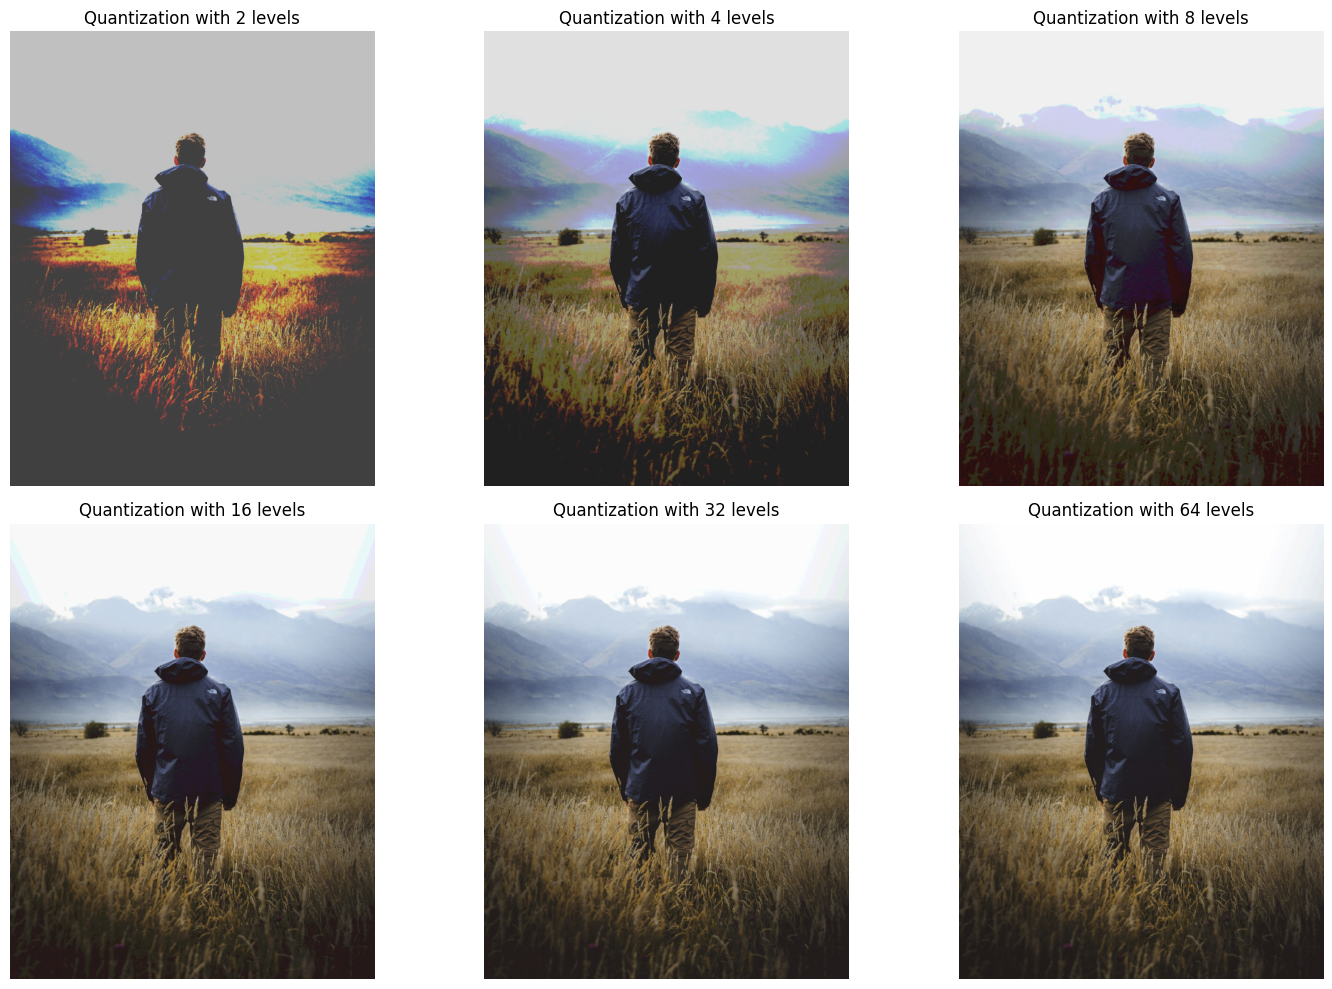

In [13]:
levels_list = [2, 4, 8, 16, 32, 64]

fig, axes = plt.subplots(2, 3, figsize=(15,10))
for ax, levels in zip(axes.ravel(), levels_list):
    q_img = quantize_image(img_rgb, levels)
    ax.imshow(q_img)
    ax.set_title(f"Quantization with {levels} levels")
    ax.axis("off")

plt.tight_layout()
plt.show()

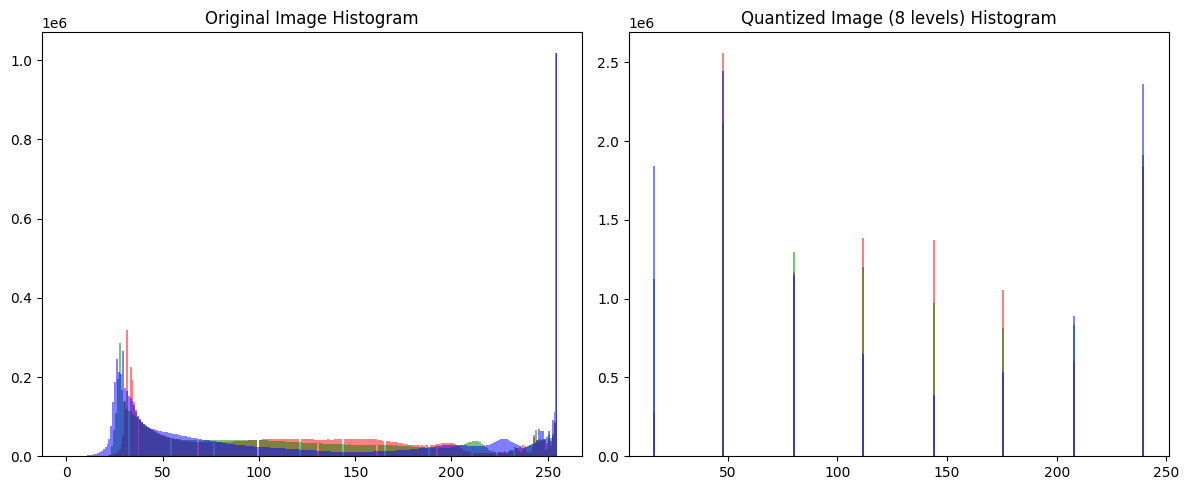

In [14]:
q_img_8 = quantize_image(img_rgb, 8)

colors = ("r","g","b")
plt.figure(figsize=(12,5))

for i,col in enumerate(colors):
    plt.subplot(1,2,1)
    plt.hist(img_rgb[:,:,i].ravel(), bins=256, color=col, alpha=0.5)
    plt.title("Original Image Histogram")

    plt.subplot(1,2,2)
    plt.hist(q_img_8[:,:,i].ravel(), bins=256, color=col, alpha=0.5)
    plt.title("Quantized Image (8 levels) Histogram")

plt.tight_layout()
plt.show()
